IMPORTING NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse

DISPLAYING DATA

In [4]:
data = pd.read_csv("codsoft_4.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


DATA CLEANING

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

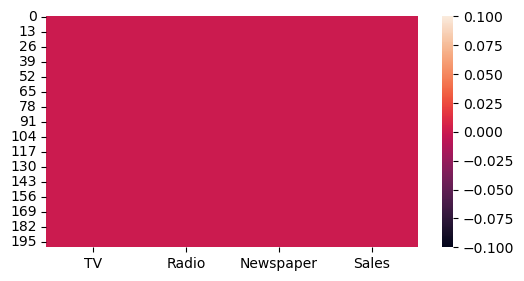

In [7]:
plt.figure(figsize=(6,3))
sns.heatmap(data.isnull())
plt.show()

In [8]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
data.nunique()

TV           190
Radio        167
Newspaper    172
Sales        121
dtype: int64

In [10]:
cols = data.columns
print(cols)

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')


EXPLORATORY DATA ANALYSIS

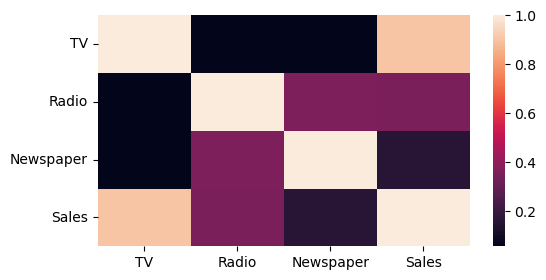

In [11]:
plt.figure(figsize=(6,3))
sns.heatmap(data.corr())
plt.show()

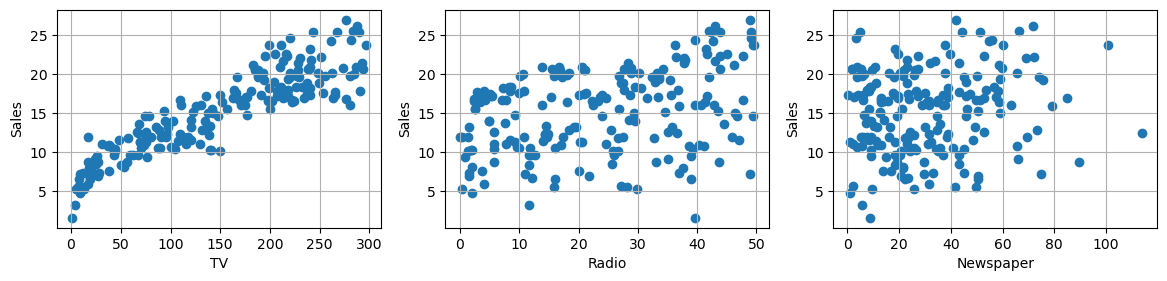

In [12]:
it = 1
temp_cols = cols[:-1]
plt.figure(figsize=(8,2))

for i in temp_cols:
    plt.subplot(1,3,it)
    plt.xlabel(i)
    plt.ylabel("Sales")
    plt.subplots_adjust(right=1.5,top = 1.2)
    plt.scatter(data[i],data["Sales"])
    plt.grid()
    it+=1

plt.show()

SPLITTING DATA AND TRAINING REGRESSION MODEL

In [13]:
X,y = data.drop(["Sales"],axis = 1),data["Sales"]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 24)
model = LinearRegression()
model.fit(x_train,y_train)
print("linear regression line intercept =" ,model.coef_,model.intercept_)
print("model score =",model.score(x_test,y_test))

linear regression line intercept = [ 0.05545844  0.10652835 -0.00156369] 4.608438388474353
model score = 0.9182030586810916


MODEL EVALUATION

In [14]:
y_pred = model.predict(x_test)
print("Mean absolute error:",mae(y_test,y_pred))
print("Mean squared error:",mse(y_test,y_pred))
print("Root mean squared error:",np.sqrt(mse(y_test,y_pred)))

Mean absolute error: 1.0717493934757383
Mean squared error: 1.923330334778619
Root mean squared error: 1.386841856441685
